In [2]:
import torch
import matplotlib.pyplot as plt

In [83]:
def showImage(image):
    tensor_normalized = (image - image.min()) / (image.max() - image.min())
    plt.imshow(tensor_normalized)
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [84]:
def checkTensorSame(tensor1, tensor2):
    checkTensor = tensor1 == tensor2
    for item in checkTensor:
        print('hi')

In [97]:
class ConvNeuralNet(torch.nn.Module):
    def __init__(self, in_channels = 3, num_classes = 10):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels, 64, 3)
        self.conv2 = torch.nn.Conv2d(64, 128, 3)

        self.pool = torch.nn.MaxPool2d(2, stride=2)

        self.fc1 = torch.nn.Linear(128 * 6 * 6, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, num_classes)


    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        # x = F.softmax(self.fc3(x), dim=1)
        # print(x)
        return x

net = ConvNeuralNet()
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH, weights_only=True))

# Freeze all the parameters in the network
net.eval()
for param in net.parameters():
    param.requires_grad = False

loss_function = torch.nn.CrossEntropyLoss()

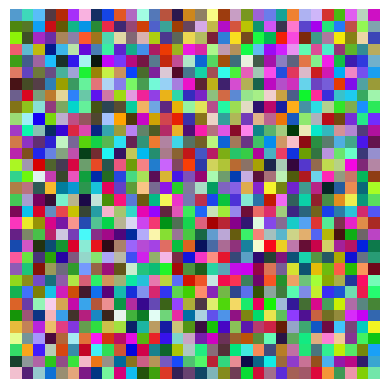

In [122]:
'''
Change the image so that I can pass it to optimizer
'''
image = torch.rand(32, 32, 3)
# print(image)
# showImage(image)

optimizerImage = image.unsqueeze(0)
# print(f"image with added batch dimension:\n----------------------\n\n{optimizerImage}\n")
optimizerImage = optimizerImage.permute(0, 3, 1, 2)
# print(f"image with channel dimension first:\n----------------------\n\n{optimizerImage}\n")
optimizerImage = optimizerImage.detach().clone()
# print(f"detached image:\n----------------------\n\n{optimizerImage}\n")
optimizerImage = optimizerImage.requires_grad_(True)
# print(f"image with required gradient:\n----------------------\n\n{optimizerImage}\n")
showImage(optimizerImage.squeeze().detach().permute(1, 2, 0))

In [123]:
optimizer = torch.optim.Adam([optimizerImage], lr=0.0001)
label = torch.tensor([1])


for i in range(1000):
    optimizer.zero_grad()
    output = net(optimizerImage)
    probabilities = torch.softmax(output, dim=1)
    predictionTensor = torch.argmax(probabilities)
    predictionInt = predictionTensor.item()
    print(predictionInt)
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    # showImage(optimizerImage.squeeze().detach().permute(1, 2, 0))

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
